# DATA analysis

## used promoters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

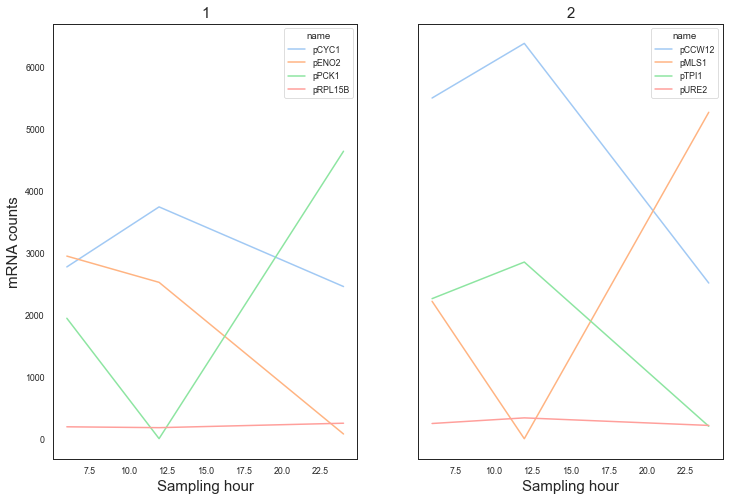

In [2]:
promoters_df = pd.read_csv('../data/raw/promoters.csv')
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df.columns = ['name', 6, 12, 24]
promoters_df = promoters_df.set_index('name')
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)

## DATA wrangling



LCMS data



- Tidy strictosidine data

In [3]:
# Lets read in plate 53 and 54

plate53 = pd.read_csv("../data/raw/023_LC-MS/2nd_library_lcms/Result_table_210927_tmet576_yp53.csv", sep = ',')
plate54 = pd.read_csv("../data/raw/023_LC-MS/2nd_library_lcms/Result_table_211001_tmet581_yp54.csv", sep = ',')



# Stack the DataFrames on top of each other - Lets add the plate 49 from before
unprocessed_lcms_results = pd.concat([ plate53, plate54 ], axis=0)
unprocessed_lcms_results

,data_file,sample_notes,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210927_TMET576_016.xms,96WP1232_A1,NaN,NaN,1351.268,180064.781,NaN,NaN,2.546823,1123.859574
1,210927_TMET576_017.xms,96WP1232_A2,NaN,NaN,4203.014,146340.297,NaN,NaN,7.921696,913.370971
2,210927_TMET576_018.xms,96WP1232_A3,NaN,NaN,NaN,144634.984,NaN,NaN,NaN,902.727400
3,210927_TMET576_019.xms,96WP1232_A4,586.062,NaN,11989.688,131989.250,1.501260,NaN,22.597750,823.800087
4,210927_TMET576_020.xms,96WP1232_A5,1812.931,NaN,17870.656,130796.781,4.644016,NaN,33.681995,816.357390
...,...,...,...,...,...,...,...,...,...,...
77,211001_TMET581_114.xms,96WP1248_H8,1526.662,NaN,15091.814,167400.484,3.910708,NaN,28.444529,1044.816402
78,211001_TMET581_115.xms,96WP1248_H9,965.164,NaN,11963.110,130024.117,2.472371,NaN,22.547656,811.534871
79,211001_TMET581_116.xms,96WP1248_H10,1988.074,NaN,20066.662,190289.266,5.092664,NaN,37.820951,1187.674860
80,211001_TMET581_117.xms,96WP1248_H11,5787.284,NaN,18192.010,159843.375,14.824745,NaN,34.287672,997.649326


In [4]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = unprocessed_lcms_results.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:5], inplace = True, axis = 1)
df_filter

#df_filter
## saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()
#
## split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates = df_filter_plates[[0,1]]
df_filter_plates.columns = ['plate', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()
#
## Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

##add 0 to all nan positions 
concatenated = concatenated.fillna(0)


### Changing the names of the plates to yp53/54
concatenated.loc[concatenated['plate'] == '96WP1232', 'plate'] = 'yp53'
concatenated.loc[concatenated['plate'] == '96WP1248', 'plate'] = 'yp54'

# Change name
lcms_results = concatenated
lcms_results

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A1
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A2
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A3
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A4
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A5
...,...,...,...,...,...,...,...,...,...
77,211001_TMET581_114.xms,96WP1248_H8,167400.484,3.910708,0.0,28.444529,1044.816402,yp54,H8
78,211001_TMET581_115.xms,96WP1248_H9,130024.117,2.472371,0.0,22.547656,811.534871,yp54,H9
79,211001_TMET581_116.xms,96WP1248_H10,190289.266,5.092664,0.0,37.820951,1187.674860,yp54,H10
80,211001_TMET581_117.xms,96WP1248_H11,159843.375,14.824745,0.0,34.287672,997.649326,yp54,H11


In [5]:
## changing the well names to incorporate a 0 between the first wells

In [6]:
well_list = lcms_results['well'].to_list()

new_well_list = []
for i in range(len(well_list)): 
    if len(well_list[i]) == 2:
        
        well = str(well_list[i][0:1])+'0'+str(well_list[i][1:2])
        new_well_list.append(well)
        well= ''
        
    else: 
        new_well_list.append(well_list[i])

lcms_results['well'] = new_well_list
lcms_results

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A01
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A02
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A03
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A04
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A05
...,...,...,...,...,...,...,...,...,...
77,211001_TMET581_114.xms,96WP1248_H8,167400.484,3.910708,0.0,28.444529,1044.816402,yp54,H08
78,211001_TMET581_115.xms,96WP1248_H9,130024.117,2.472371,0.0,22.547656,811.534871,yp54,H09
79,211001_TMET581_116.xms,96WP1248_H10,190289.266,5.092664,0.0,37.820951,1187.674860,yp54,H10
80,211001_TMET581_117.xms,96WP1248_H11,159843.375,14.824745,0.0,34.287672,997.649326,yp54,H11


## Merge Plate design yp48-52 metadata into single csv file


In [7]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp53-54_MIA-HA-111-145.xlsx')

# reading the different sheets
df1 = pd.read_excel(xls, 'yp53_reallocated')  # plate 53
df1["plate"] = 'yp53' 

df2 = pd.read_excel(xls, '111-115_121-125_136-140-145yp54') # plate 54
df2["plate"] = 'yp54' 


In [8]:
results_merged = pd.concat([df1, df2], ignore_index=True)

In [9]:
results_merged

,position,Sample name,Cellular compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,Genotype,Date of sampling,old position,plate
0,A01,20210922MIA-HA-116_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A01,yp53
1,A02,20210922MIA-HA-116_2,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,2.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A02,yp53
2,A03,20210922MIA-HA-116_3,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,3.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A03,yp53
3,A04,20210922MIA-HA-116_4,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,4.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A04,yp53
4,A05,20210922MIA-HA-117_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-117,SmusG8H AanCPR,20210922.0,A05,yp53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
188,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
189,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
190,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54


In [10]:
results_merged.to_csv('../data/processed/023_LC-MS/yp53-54_meta_LL.csv', header = True, index = False)

In [11]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp53-54_meta_LL.csv') 
PlateDesign

,position,Sample name,Cellular compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,Genotype,Date of sampling,old position,plate
0,A01,20210922MIA-HA-116_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A01,yp53
1,A02,20210922MIA-HA-116_2,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,2.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A02,yp53
2,A03,20210922MIA-HA-116_3,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,3.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A03,yp53
3,A04,20210922MIA-HA-116_4,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,4.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A04,yp53
4,A05,20210922MIA-HA-117_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-117,SmusG8H AanCPR,20210922.0,A05,yp53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
188,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
189,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
190,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54


In [172]:
pd.set_option('display.max_rows', 20)


In [173]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'Genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

KeyError: "['position', 'Strain', 'Replicate #', 'Genotype', 'Medium'] not in index"

In [14]:
# Merge our lcms file with the genotype/strain 
lcms_platedesign = pd.merge(lcms_results, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
lcms_platedesign

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A01,MIA-HA-116,1.0,VminG8H AanCPR,YPD
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A02,MIA-HA-116,2.0,VminG8H AanCPR,YPD
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A03,MIA-HA-116,3.0,VminG8H AanCPR,YPD
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A04,MIA-HA-116,4.0,VminG8H AanCPR,YPD
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A05,MIA-HA-117,1.0,SmusG8H AanCPR,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,211001_TMET581_114.xms,96WP1248_H8,167400.484,3.910708,0.0,28.444529,1044.816402,yp54,H08,NaN,NaN,NaN,NaN
164,211001_TMET581_115.xms,96WP1248_H9,130024.117,2.472371,0.0,22.547656,811.534871,yp54,H09,NaN,NaN,NaN,NaN
165,211001_TMET581_116.xms,96WP1248_H10,190289.266,5.092664,0.0,37.820951,1187.674860,yp54,H10,NaN,NaN,NaN,NaN
166,211001_TMET581_117.xms,96WP1248_H11,159843.375,14.824745,0.0,34.287672,997.649326,yp54,H11,NaN,NaN,NaN,NaN


## YP53+54

*** Experiment
1. Check if MIA-HA-x strains produces MIA's 

Strains  
1. YP53

Media feed: 0.2 mM geraniol & 1 mM tryptamine
1. YP + 2 % glucose + feed


Cultivation 30C, 300 rpm 
1. (d-2): Inoculate precultures. Transfer 20 of YP48 g.stock to 80 media 1 (-feed). 
2. (d0):  Inoculate maincultures. Transfer 10 of preculture to  500 media 1 and media 2
3. (e6): transfer 180 ul -> analytics filter and add standard
    6. Measure MIAs (extracellular loganin)
4. (TBD): Khem run plate
5. (TBD): Data analysis


*** Experiment:
- Strains: 4 colonies from each of 35 library plates. Each plate has specific combination of G8H and CPR but any of 4 possible promoter combinations
- Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
- Sampling: day 6

In [41]:
plate53

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A01,MIA-HA-116,1.0,VminG8H AanCPR,YPD
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A02,MIA-HA-116,2.0,VminG8H AanCPR,YPD
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A03,MIA-HA-116,3.0,VminG8H AanCPR,YPD
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A04,MIA-HA-116,4.0,VminG8H AanCPR,YPD
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A05,MIA-HA-117,1.0,SmusG8H AanCPR,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,210927_TMET576_118.xms,96WP1232_H8,137948.813,3.038375,0.0,30.908774,860.996211,yp53,H08,MIA-CH-A2,2.0,NaN,YPD
83,210927_TMET576_119.xms,96WP1232_H9,132422.063,3.245648,0.0,32.612530,826.501454,yp53,H09,MIA-CH-A2,3.0,NaN,YPD
84,210927_TMET576_120.xms,96WP1232_H10,119852.172,2.673744,0.0,22.711625,748.047510,yp53,H10,MIA-CH-A2,4.0,NaN,YPD
85,210927_TMET576_121.xms,96WP1232_H11,141877.813,16.261548,0.0,54.913387,885.518743,yp53,H11,MIA-CM-3,1.0,NaN,YPD


In [29]:
control_strict_df = lcms_platedesign.loc[lcms_platedesign['strain'] == 'MIA-CH-A2']
df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
print(df_mean)
control_strict_df

28.1150946125


,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium
81,210927_TMET576_117.xms,96WP1232_H7,148983.953,2.317657,0.0,26.227450,929.871133,yp53,H07,MIA-CH-A2,1.0,NaN,YPD
82,210927_TMET576_118.xms,96WP1232_H8,137948.813,3.038375,0.0,30.908774,860.996211,yp53,H08,MIA-CH-A2,2.0,NaN,YPD
83,210927_TMET576_119.xms,96WP1232_H9,132422.063,3.245648,0.0,32.612530,826.501454,yp53,H09,MIA-CH-A2,3.0,NaN,YPD
84,210927_TMET576_120.xms,96WP1232_H10,119852.172,2.673744,0.0,22.711625,748.047510,yp53,H10,MIA-CH-A2,4.0,NaN,YPD


In [30]:
#plate53 = lcms_platedesign.loc[lcms_platedesign['plate'] == 'yp53']
#plate54 = lcms_platedesign.loc[lcms_platedesign['plate'] == 'yp54']
#
## Getting the controls from 53
#control_strict_df1 = plate53.loc[plate53['well'] == 'H07'] # No data on this by lcms apparently 
#control_strict_df2 = plate53.loc[plate53['well'] == 'H08']
#control_strict_df3 = plate53.loc[plate53['well'] == 'H09']
#control_strict_df4 = plate53.loc[plate53['well'] == 'H10']
#
#
## Getting the controls from 53
#control_strict_df5 = plate54.loc[plate54['well'] == 'F08'] # No data on this by lcms apparently 
#control_strict_df6 = plate54.loc[plate54['well'] == 'F09']
#control_strict_df7 = plate54.loc[plate54['well'] == 'F10']
#control_strict_df8 = plate54.loc[plate54['well'] == 'F11']
#
#
## Control df
#control_strict_df =  pd.concat([control_strict_df1, control_strict_df2,control_strict_df3, 
#                                control_strict_df4, control_strict_df5, control_strict_df6, 
#                                control_strict_df7, control_strict_df8], axis=0, ignore_index=True)
#
#df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
#print(df_mean)
#control_strict_df

## Normalize strictosidine productions

In [44]:
# make a copy and a new row
norm_strict_df = lcms_platedesign.copy()
norm_strict_df['norm_strict_%'] = 0

# normalize that row
for index, row in norm_strict_df.iterrows():
    normalized = ((row['Amt_uM_Strictosidine']/df_mean)*100)
    norm_strict_df.at[index, 'norm_strict_%'] = normalized

    
# Sort the data
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()


# Lets remove Mia-CM3 - the control
#sorted_df = sorted_df[sorted_df['strain'] != 'MIA-CM-3' ]
sorted_df_lcms = sorted_df #[sorted_df['strain'] != 'MIA-CH-A2' ]

sorted_df_lcms

,index,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium,norm_strict_%
0,85,210927_TMET576_121.xms,96WP1232_H11,141877.813,16.261548,0.0,54.913387,885.518743,yp53,H11,MIA-CM-3,1.0,NaN,YPD,195.316389
1,44,210927_TMET576_063.xms,96WP1232_D9,124164.867,7.054980,0.0,47.692027,774.964842,yp53,D09,MIA-HA-132,1.0,SmusG8H RseCPR,YPD,169.631396
2,29,210927_TMET576_047.xms,96WP1232_C6,151006.359,8.910505,0.0,44.848557,942.493815,yp53,C06,MIA-HA-128,2.0,RsepG8H CloCPR,YPD,159.517718
3,6,210927_TMET576_022.xms,96WP1232_A7,131414.891,7.860359,0.0,44.719792,820.215273,yp53,A07,MIA-HA-117,3.0,SmusG8H AanCPR,YPD,159.059724
4,49,210927_TMET576_083.xms,96WP1232_E2,148120.250,5.506115,0.0,40.809806,924.480402,yp53,E02,MIA-HA-133,2.0,RsepG8H RseCPR,YPD,145.152656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,74,210927_TMET576_110.xms,96WP1232_G3,211609.719,0.000000,0.0,0.000000,1320.744720,yp53,G03,MIA-HA-144,3.0,CroG8H AniCPR,YPD,0.000000
164,75,210927_TMET576_111.xms,96WP1232_G4,186587.766,0.000000,0.0,0.000000,1164.572251,yp53,G04,MIA-HA-144,4.0,CroG8H AniCPR,YPD,0.000000
165,76,210927_TMET576_112.xms,96WP1232_G5,184884.563,0.000000,0.0,0.000000,1153.941849,yp53,G05,n.ctr(36),1.0,NaN,YPD,0.000000
166,86,210927_TMET576_122.xms,96WP1232_H12,138742.094,0.000000,0.0,0.000000,865.947410,yp53,H12,BLANK,1.0,NaN,YPD,0.000000


# Plotting plate 53

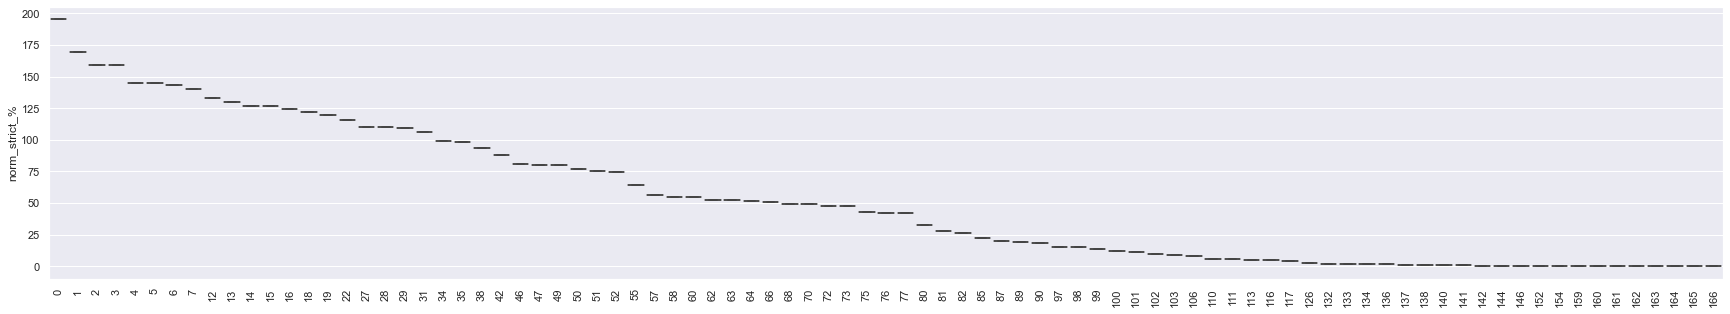

In [50]:
# Plotting plate 53
plate53 = sorted_df_lcms.loc[sorted_df_lcms['plate'] == 'yp53']

import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


box_plot=sns.boxplot(x=plate53.index, y='norm_strict_%',data=plate53)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

# plotting plate 54

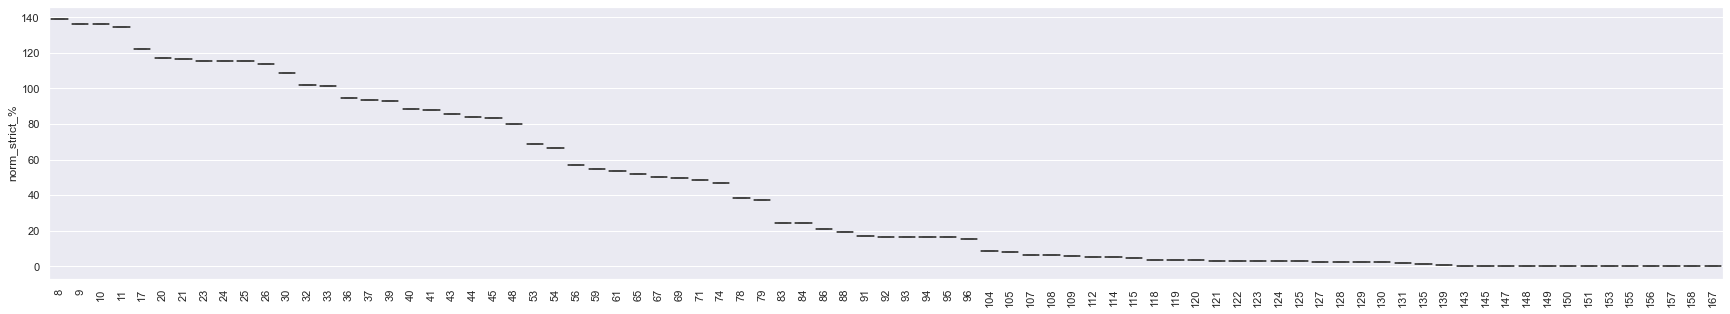

In [49]:
# Plotting plate 53
plate54 = sorted_df_lcms.loc[sorted_df_lcms['plate'] == 'yp54']

import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


box_plot=sns.boxplot(x=plate54.index, y='norm_strict_%',data=plate54)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

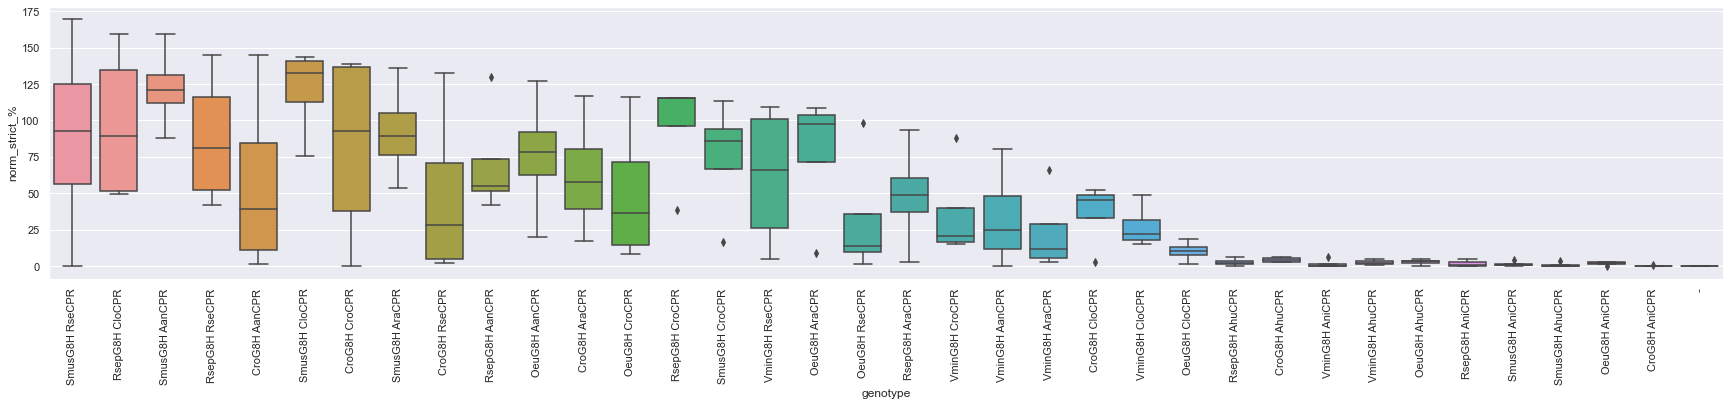

In [32]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df_lcms)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

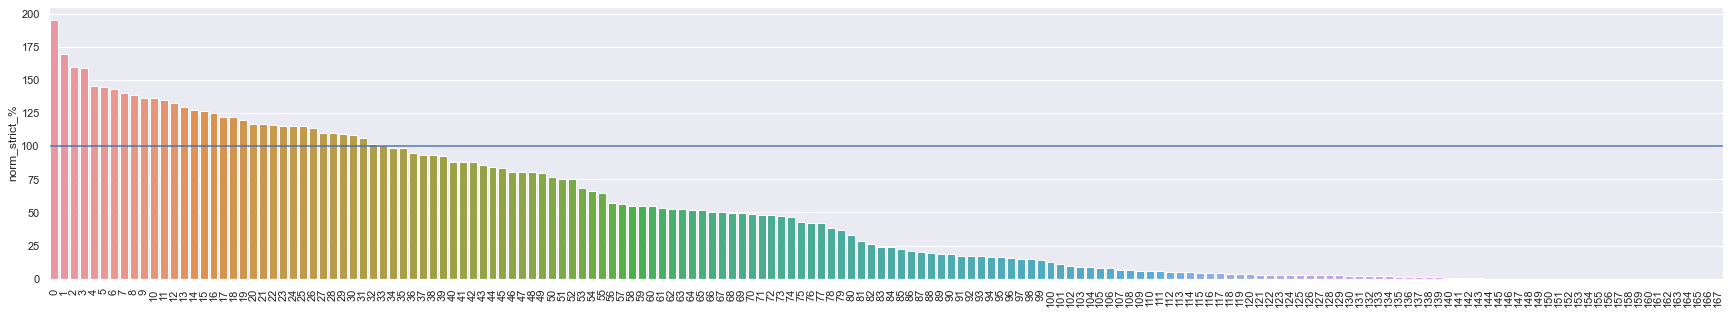

In [33]:
histogram = sns.barplot(data=sorted_df_lcms, x=sorted_df_lcms.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

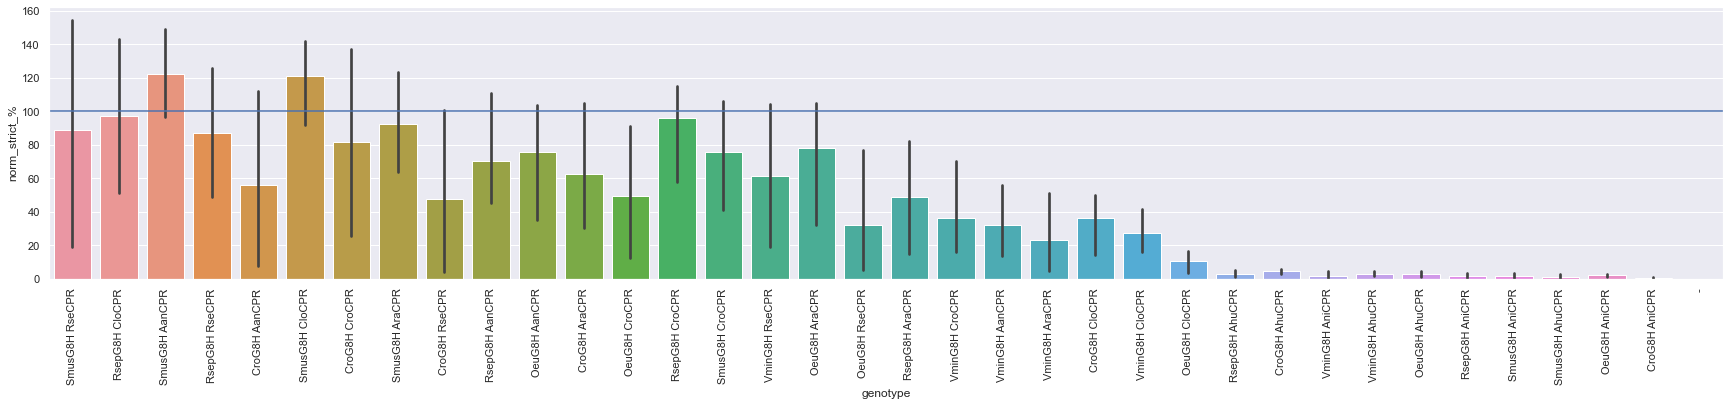

In [34]:
histogram = sns.barplot(data=sorted_df_lcms, x='genotype', y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

# Genotyping

In [52]:
import os

In [54]:
path = '../data/raw/10_Sanger_results/'
files = os.listdir(path)
files

['PlateReport_yp51_cpr.xls',
 'PlateReport_yp49_cpr.xls',
 'PlateReport_yp50_cpr.xls',
 'PlateReport_yp51_g8h.xls',
 'PlateReport_yp54_cpr_Run1.xlsx',
 'ab1',
 'PlateReport_yp53_g8h_Run1.xlsx',
 'PlateReport_yp54_g8h_Run1.xlsx',
 'PlateReport_yp50_g8h.xls',
 'PlateReport_yp53_cpr_Run1.xlsx',
 'PlateReport_yp49_g8h.xls',
 '.ipynb_checkpoints',
 'sanger_fasta']

In [55]:
yp53_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp53_g8h_Run1.xlsx')
yp53_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp53_cpr_Run1.xlsx')
yp54_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp54_g8h_Run1.xlsx')
yp54_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp54_cpr_Run1.xlsx')


# list of all the dataframes
sequencing_plates = [yp53_g8h, yp53_cpr, yp54_g8h, yp54_cpr]

In [56]:
sequencing_plates

[               Plate:yp53_g8h_Run1     Unnamed: 1        Unnamed: 2  \
 0                   mean CRL: 514n            NaN               NaN   
 1         CRL < = 100 n: 2 (2.47%)            NaN               NaN   
 2   CRL > 100 < 500 n: 55 (67.90%)            NaN               NaN   
 3       CRL > = 500 n: 24 (29.63%)            NaN               NaN   
 4                              NaN            NaN               NaN   
 ..                             ...            ...               ...   
 83                             G05  yp53re_g8h_G5  24.7727272727273   
 84                             G06  yp53re_g8h_G6  51.0284360189573   
 85                             G07  yp53re_g8h_G7  50.0915492957746   
 86                             G08  yp53re_g8h_G8  50.9811320754717   
 87                             G09  yp53re_g8h_G9  50.9623529411765   
 
    Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  
 0         NaN        NaN        NaN        NaN  
 1         NaN        NaN        N

In [57]:
def slicing_and_naming_seq_plates(sequencing_plates, where_to_slice = 7) -> list: 

    # changing column names and slicing
    for i in range(len(sequencing_plates)): 
        sequencing_plates[i].columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used")#sequencing_plates[0].iloc[6]
        sequencing_plates[i] = sequencing_plates[i][where_to_slice:]
        
    return sequencing_plates


In [58]:
# making all values floats

def plat_seq_data_wrangler(sequencing_plates:list) -> list:

    list_with_dfs =[]
    
    for i in range(len(sequencing_plates)):
        # taking only a subset of the dataframe:
        numeric_values = sequencing_plates[i][["AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used"]]

        # if values are non nummeric make them NaN
        numeric_values = numeric_values.replace('n.a.', np.NaN)

        # Making them numeric
        numeric_values = numeric_values.apply(pd.to_numeric, errors='coerce')

        # Adding names column
        name_column = sequencing_plates[i]["Sample-Name"]
        number_column = sequencing_plates[i]["Number"]
        
        # Adding them to the dataframe
        data1 = pd.concat([number_column, name_column,numeric_values], axis = 1)
        list_with_dfs.append(data1)

    return list_with_dfs

In [59]:
def plate_AvgQual(list_of_dfs_numeric:list, Avg_qual = 50, used_bases = 25 ) -> list:
    
    # Initialize
    filtered_plates = []

    for i in range(len(list_of_dfs_numeric)):
        # Filter 
        filter_Avg_qual = list_of_dfs_numeric[i][list_of_dfs_numeric[i]["AvgQual"] > Avg_qual ]
        filer_used_bases = filter_Avg_qual[filter_Avg_qual["used"] > used_bases ]
        # Save the filtered plates
        filtered_plates.append(filer_used_bases)
    
    return filtered_plates

In [60]:
def split_df_names(df_names_column, which_column_to_split1 = 0, which_column_to_split2 = 2 ) -> list: 
    
    df_with_names_split =[]
    
    for i in range(len(df_names_column)):
        # splitting
        df_filter_plates = df_names_column[i]['Sample-Name'].str.split('_', expand=True)
        
        # selecting
        column1 = df_filter_plates[which_column_to_split1]
        column2 = df_filter_plates[which_column_to_split2]
        #column3 = df_filter_plates[3:]

        
        # concating
        concatenated = pd.concat([df_names_column[i], column1, column2], axis=1, ignore_index=False)
        
        # changing names 
        concatenated.columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used", 'plate', 'well')
        
        # save 
        df_with_names_split.append(concatenated)
        
    return df_with_names_split

In [61]:
def concatenating_list_of_dfs(list_of_dfs:list): 
    ''' concatenating dataframes '''
    assembled_dfs = pd.concat(list_of_dfs, axis=0, ignore_index=False)
    
    return assembled_dfs

### Data wrangling of plateSeq2 excel files

In [62]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

# Changing names
#merged_with_genotyping = pd.merge(sorted_df_lcms, all_data_frames, left_on=['plate','well'], right_on = ['plate','well'])

#merged_with_genotyping

all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,A01,yp53re_g8h_A1,51.032787,986.0,21.0,447.0,349.0,yp53re,A1
8,A02,yp53re_g8h_A2,50.974178,980.0,22.0,447.0,349.0,yp53re,A2
10,A04,yp53re_g8h_A4,54.070009,1171.0,10.0,1066.0,1010.0,yp53re,A4
12,A06,yp53re_g8h_A6,50.528169,1025.0,21.0,446.0,352.0,yp53re,A6
13,A07,yp53re_g8h_A7,50.837367,1181.0,9.0,1041.0,939.0,yp53re,A7
...,...,...,...,...,...,...,...,...,...
65,E11,yp54_cpr_E11,57.210332,1329.0,12.0,1095.0,1103.0,yp54,E11
66,E12,yp54_cpr_E12,56.280039,1161.0,23.0,1054.0,956.0,yp54,E12
70,F04,yp54_cpr_F4,55.799822,1280.0,22.0,1145.0,1136.0,yp54,F4
76,F10,yp54_cpr_F10,56.107972,1175.0,16.0,1006.0,960.0,yp54,F10


In [70]:
## Adding a zero to all the numers before 10
wells = []
for index, row in all_data_frames.iterrows():
    if len(row['well']) == 2: 
        letter, number = row['well'][0:1], row['well'][1:2]
        #print(letter, number)
        row['well'] = letter + '0' + number
        wells.append(row['well'])
    else: 
        wells.append(row['well'])
        
        
all_data_frames['well'] = wells
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,A01,yp53re_g8h_A1,51.032787,986.0,21.0,447.0,349.0,yp53re,A01
8,A02,yp53re_g8h_A2,50.974178,980.0,22.0,447.0,349.0,yp53re,A02
10,A04,yp53re_g8h_A4,54.070009,1171.0,10.0,1066.0,1010.0,yp53re,A04
12,A06,yp53re_g8h_A6,50.528169,1025.0,21.0,446.0,352.0,yp53re,A06
13,A07,yp53re_g8h_A7,50.837367,1181.0,9.0,1041.0,939.0,yp53re,A07
...,...,...,...,...,...,...,...,...,...
65,E11,yp54_cpr_E11,57.210332,1329.0,12.0,1095.0,1103.0,yp54,E11
66,E12,yp54_cpr_E12,56.280039,1161.0,23.0,1054.0,956.0,yp54,E12
70,F04,yp54_cpr_F4,55.799822,1280.0,22.0,1145.0,1136.0,yp54,F04
76,F10,yp54_cpr_F10,56.107972,1175.0,16.0,1006.0,960.0,yp54,F10


### ALl reads vs used bases 

In [89]:
concating_all_plates_with_bad_reads = concatenating_list_of_dfs(sequencing_plates)
# Making the values numeric
concating_all_plates_with_bad_reads["AvgQual"] = pd.to_numeric(concating_all_plates_with_bad_reads["AvgQual"])

concating_all_plates_with_bad_reads

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,A01,yp53re_g8h_A1,51.032787,986.0,21.0,447.0,349.0
8,A02,yp53re_g8h_A2,50.974178,980.0,22.0,447.0,349.0
9,A03,yp53re_g8h_A3,0.000000,1337.0,0.0,0.0,21.0
10,A04,yp53re_g8h_A4,54.070009,1171.0,10.0,1066.0,1010.0
11,A05,yp53re_g8h_A5,49.158019,1026.0,22.0,445.0,347.0
...,...,...,...,...,...,...,...
81,G03,yp54_cpr_G3,0.000000,202.0,0.0,0.0,0.0
82,G04,H2O,0.000000,520.0,0.0,0.0,17.0
83,G05,Empty_2,0.000000,260.0,0.0,0.0,0.0
84,G06,Empty,0.000000,272.0,0.0,0.0,16.0


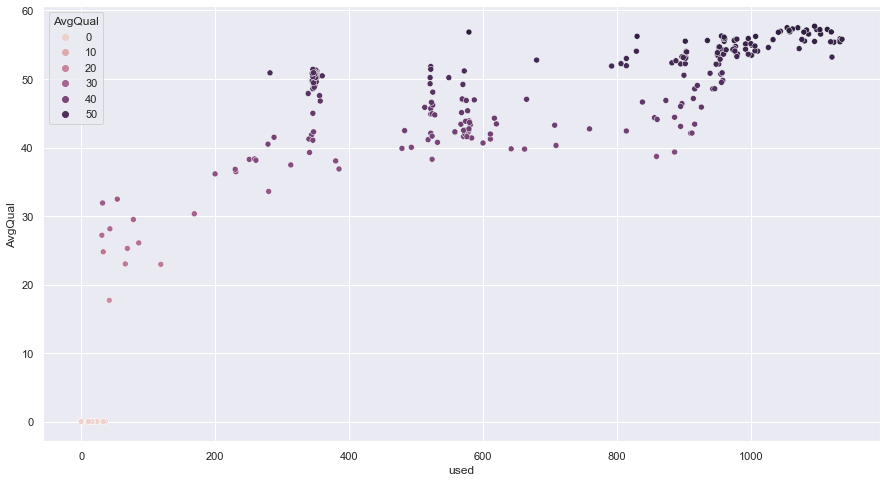

In [90]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=concating_all_plates_with_bad_reads, x="used", y="AvgQual", hue="AvgQual")
None

### AvgQual > 50 reads vs used bases 

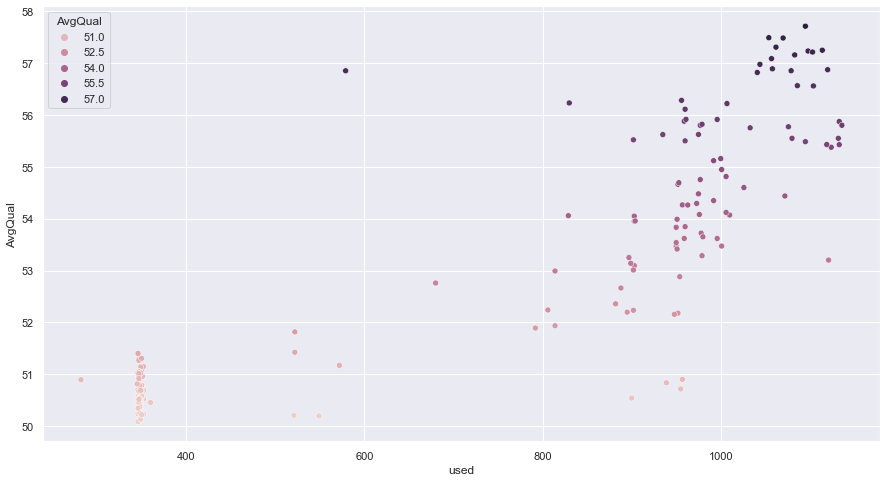

In [91]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=all_data_frames, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

### Infering promoter to sample relationship

### sanger reports

#### primers

In [92]:
from Bio import SeqIO

In [93]:
pad_pG8H_fw = SeqIO.read('../notebooks/pad_pG8H_fw.fasta', format = 'fasta')
pad_pCPR_fw = SeqIO.read('../notebooks/pad_pCPR_fw.fasta', format = 'fasta')
pad_pCPR_fw

primers_for_seq = [pad_pG8H_fw, pad_pCPR_fw]
primers_for_seq

[SeqRecord(seq=Seq('TGCCCATTCGATAAGGCA'), id='seq_mSRja9xj', name='seq_mSRja9xj', description='seq_mSRja9xj <unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GGCGTATGGACCTGTCT'), id='seq_G6JFHeOC', name='seq_G6JFHeOC', description='seq_G6JFHeOC <unknown description>', dbxrefs=[])]

### promoter

In [94]:
pCPR = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pCPR_sites.gb', format= 'gb'):
    pCPR.append(seq_record)
    
pG8H = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pG8H_sites.gb', format= 'gb'):
    pG8H.append(seq_record)
    
    
pG8H = [site for site in pG8H]

templates = pCPR+pG8H

In [95]:
pG8H

[SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('GTACTGCTGGCCATTTTTATTCAGGTTATTTGCGATTAGGTTGGGGTTTGTGTT...GCA'), id='seq_NFnLfXI8', name='pRPL15B', description='', dbxrefs=[])]

In [101]:
path = '../data/raw/10_Sanger_results/ab1_second_round'
files = os.listdir(path)

In [110]:

reads = []
for read in files:
    if read != '.ipynb_checkpoints': 
        reads.append(SeqIO.read('../data/raw/10_Sanger_results/ab1_second_round/'+read, 'abi'))#
reads[0:20]

[SeqRecord(seq=Seq('NNNNNNNNNGNNNGNNNNTTGGNNNNTTTCCAAAANTCAATAGCATGCAGGACG...NNN'), id='SEQ10004595_A2_C05_0', name='yp54_cpr_C5_C05-pad_cpr_fw', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNGNNTANTTTCCAAAAAANCAATAGCNTGC...NNN'), id='SEQ10004595_A1_D01_0', name='yp53re_cpr_D1_D01-pad_cpr_fw', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNNNTCGNNNNNNNNNNGTTTTAGTGNGTGAATGAAATAGGTGTA...NNN'), id='SEQ10004595_B2_D01_0', name='yp54_g8h_D1_D01-pad_g8h_fw', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNTTCGNNNNNNNNTGTTTTAGTGTGTGAATGAAATAGGTGTATG...NNA'), id='SEQ10004595_B1_C05_0', name='yp53re_g8h_C5_C05-pad_g8h_fw', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNANNNNNNNNNTGANNGGCTACCAAAAACGATAATCTCAACTGTAAAC...NNN'), id='SEQ10004595_A2_A02_0', name='yp54_cpr_A2_A02-pad_cpr_fw', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNNNCCAAATGAGCTAGAAGGTGGNNTTAACAAATATAATGACAA...NNN'), id='SEQ10004595_B2_C10_0', name='yp54

###  New sequencing module

getting the hits that have a proper quality:
    

In [105]:
reads[12]

SeqRecord(seq=Seq('NNNNNNNNNNNCTTCGNCANNNNNNGTTTTAGTGTGTGAATGAAATAGGTGTAT...NNN'), id='SEQ10004595_B1_D04_0', name='yp53re_g8h_D4_D04-pad_g8h_fw', description='', dbxrefs=[])

## Aligning promoters to reads - infer promoter alignment

In [107]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]
numbers_list = [5, 7,6, 8, 1, 2, 3, 4]

for i in range(len(templates)): 
    templates[i].description = numbers_list[i]
    
templates

[SeqRecord(seq=Seq('AAAGAAACTTAATACGTTATGCCGTAATGAAGGGCTACCAAAAACGATAATCTC...ATA'), id='seq_KLllyItE', name='pCCW12', description=5, dbxrefs=[]),
 SeqRecord(seq=Seq('TTTAATCTTTAGGGAGGGTAAAGTTGGATTCATCAATTTGATGAAATCCGTGTA...AAA'), id='seq_oMyQ3Qgm', name='pMLS1', description=7, dbxrefs=[]),
 SeqRecord(seq=Seq('AAGGATGAGCCAAGAATAAGGGAACAAGATTTTGGTAATTTCCAAAAAATCAAT...AAA'), id='seq_Au475lsO', name='pTPI1', description=6, dbxrefs=[]),
 SeqRecord(seq=Seq('CAAGCTGAACTCGCTGAAATTGAAAGAAAACTGGCAGAATCGTCTTCTGAAGAC...CAA'), id='seq_y4NqOW17', name='pURE2', description=8, dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCATTTTCAAAGGTGTGTTCTTCGTCAGACATGTTTTAGTGTGTGAATGAAA...ATA'), id='seq_DPrPIMvy', name='pCYC1', description=1, dbxrefs=[]),
 SeqRecord(seq=Seq('AATCCTACTCTTGCCGTTGCCATCCAAAATGAGCTAGAAGGTGGATTAACAAAT...ATA'), id='seq_8wWqUcpf', name='pENO2', description=2, dbxrefs=[]),
 SeqRecord(seq=Seq('CACATGTCGACGAGTTTGTCATCGAATCCGTAATGAAGGCGCAAGAAAAACTAG...AAC'), id='seq_Bs85fGcK', name='pPCK1', description=

In [109]:
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,A01,yp53re_g8h_A1,51.032787,986.0,21.0,447.0,349.0,yp53re,A01
8,A02,yp53re_g8h_A2,50.974178,980.0,22.0,447.0,349.0,yp53re,A02
10,A04,yp53re_g8h_A4,54.070009,1171.0,10.0,1066.0,1010.0,yp53re,A04
12,A06,yp53re_g8h_A6,50.528169,1025.0,21.0,446.0,352.0,yp53re,A06
13,A07,yp53re_g8h_A7,50.837367,1181.0,9.0,1041.0,939.0,yp53re,A07
...,...,...,...,...,...,...,...,...,...
65,E11,yp54_cpr_E11,57.210332,1329.0,12.0,1095.0,1103.0,yp54,E11
66,E12,yp54_cpr_E12,56.280039,1161.0,23.0,1054.0,956.0,yp54,E12
70,F04,yp54_cpr_F4,55.799822,1280.0,22.0,1145.0,1136.0,yp54,F04
76,F10,yp54_cpr_F10,56.107972,1175.0,16.0,1006.0,960.0,yp54,F10


In [112]:
# lets limit the alingment to only reads that are of proper quality
sample_names = all_data_frames['Sample-Name'].tolist()
print(len(sample_names))

good_samples = []
for i in range(len(reads)):
    for j in range(len(sample_names)): 
        if reads[i].name == sample_names[j]: 
            good_samples.append(reads[i])
            
print(len(good_samples))
print(len(reads))

172
0
314


In [113]:
def pairwise_alignment_of_templates(reads:list, templates:list, primers:list) -> dict: 
    '''Infers relationship of templates to reads based on highest score from a pairwise alignment '''
    
    best_scores = []
    read_list = []
    template_list = []
    template_number_list = []

    for i in range(len(reads)):

        sample = reads[i].seq.replace("N", "")
        
        # If we see the primers in the sample we the alignment will start from there
        for k in range(len(primers)):
            start = sample.find(primers[k].seq)
            
            if start != -1: 
                sample[start:]
            else: 
                continue

        # Aling with templates
        if len(sample) > 25:
            score = 0.0
            for j in range(len(templates)): 
                template = templates[j].seq

                # Align # identical = 1, non-identical = -2 , gap = -2 , extending gap = -2
                #alignments = pairwise2.align.globalms(template, sample,2, -2, -5, -5)
                alignments = pairwise2.align.localxx(template, sample)

    
                # take the first and highest score 
                alignment_score = float(alignments[0].score)

                # Get the best alignment of them all 
                if alignment_score > score: 
                    score = alignment_score
                    temp_name = templates[j].name
                    temp_number = templates[j].description
                    read_name = reads[i].name                

        #Saving the alignmets and their names
        #if read_name not in read_list: 
        best_scores.append(score)
        read_list.append(read_name)
        template_list.append(temp_name)
        template_number_list.append(temp_number)


    # Making a pandas. dataframe
    df_promoters = pd.DataFrame()
    df_promoters['Sample-Name']  = read_list
    df_promoters['inf_promoter_name'] = template_list
    df_promoters['align_score'] = best_scores
    df_promoters['inf_promoter'] = template_number_list
  
    
    return df_promoters

In [114]:
len(templates)

8

## Aligning with homemade functions

In [115]:
%%time

df_alignment = pairwise_alignment_of_templates(reads,templates, primers_for_seq)
#df_alignment = pairwise_alignment_of_templates(reads,templates )

df_alignment

CPU times: user 9min 26s, sys: 2.03 s, total: 9min 28s
Wall time: 9min 28s


,Sample-Name,inf_promoter_name,align_score,inf_promoter
0,yp54_cpr_C5_C05-pad_cpr_fw,pTPI1,966.0,6
1,yp53re_cpr_D1_D01-pad_cpr_fw,pTPI1,925.0,6
2,yp54_g8h_D1_D01-pad_g8h_fw,pCYC1,530.0,1
3,yp53re_g8h_C5_C05-pad_g8h_fw,pCYC1,502.0,1
4,yp54_cpr_A2_A02-pad_cpr_fw,pCCW12,799.0,5
...,...,...,...,...
309,yp53re_g8h_B9_B09-pad_g8h_fw,pENO2,959.0,2
310,yp54_cpr_A6_A06-pad_cpr_fw,pCCW12,121.0,5
311,yp54_cpr_B9_B09-pad_cpr_fw,pTPI1,968.0,6
312,yp53re_g8h_A6_A06-pad_g8h_fw,pCYC1,520.0,1


In [116]:
col_list =  list(df_alignment["align_score"])
print(col_list)

[966.0, 925.0, 530.0, 502.0, 799.0, 964.0, 886.0, 944.0, 512.0, 868.0, 507.0, 882.0, 504.0, 963.0, 611.0, 959.0, 512.0, 790.0, 964.0, 906.0, 957.0, 952.0, 954.0, 930.0, 968.0, 717.0, 965.0, 521.0, 964.0, 964.0, 498.0, 643.0, 942.0, 201.0, 511.0, 509.0, 959.0, 644.0, 811.0, 519.0, 512.0, 636.0, 766.0, 493.0, 512.0, 856.0, 969.0, 521.0, 965.0, 516.0, 663.0, 968.0, 944.0, 963.0, 857.0, 954.0, 798.0, 956.0, 964.0, 532.0, 874.0, 789.0, 509.0, 504.0, 484.0, 527.0, 662.0, 523.0, 648.0, 648.0, 515.0, 945.0, 965.0, 810.0, 882.0, 522.0, 529.0, 885.0, 684.0, 896.0, 972.0, 957.0, 964.0, 504.0, 828.0, 528.0, 488.0, 107.0, 957.0, 700.0, 961.0, 820.0, 523.0, 543.0, 780.0, 958.0, 521.0, 528.0, 926.0, 967.0, 967.0, 967.0, 957.0, 627.0, 681.0, 963.0, 518.0, 953.0, 464.0, 955.0, 519.0, 605.0, 398.0, 691.0, 963.0, 482.0, 529.0, 313.0, 790.0, 504.0, 688.0, 967.0, 505.0, 873.0, 954.0, 518.0, 247.0, 782.0, 584.0, 955.0, 951.0, 970.0, 634.0, 637.0, 599.0, 524.0, 509.0, 513.0, 513.0, 945.0, 515.0, 515.0, 493.0

In [117]:
minvalue = df_alignment['align_score'].min()
minvalue

28.0

In [118]:
df_align_sort = df_alignment.sort_values(['Sample-Name'])
df_align_sort

,Sample-Name,inf_promoter_name,align_score,inf_promoter
132,yp53re_cpr_A10_A10-pad_cpr_fw,pCCW12,634.0,5
188,yp53re_cpr_A11_A11-pad_cpr_fw,pTPI1,904.0,6
247,yp53re_cpr_A12_A12-pad_cpr_fw,pTPI1,851.0,6
93,yp53re_cpr_A1_A01-pad_cpr_fw,pCCW12,543.0,5
41,yp53re_cpr_A2_A02-pad_cpr_fw,pCCW12,636.0,5
...,...,...,...,...
238,yp54_g8h_F9_F09-pad_g8h_fw,pCYC1,584.0,1
241,yp54_g8h_G1_G01-pad_g8h_fw,pENO2,446.0,2
217,yp54_g8h_G2_G02-pad_g8h_fw,pENO2,484.0,2
117,yp54_g8h_G3_G03-pad_g8h_fw,pENO2,313.0,2


In [134]:
df_alignment['position'] = ''
position = []
plate_list = []
well_list = []

for index, row in df_alignment.iterrows():
    # Split data
    split = str(row['Sample-Name'].split("_")[1])
    plate = str(row['Sample-Name'].split("_")[0])
    well = str(row['Sample-Name'].split("_")[3])
    
    # get the right position 
    if split == 'g8h': 
        position.append(1)
    if split == 'cpr': 
        position.append(2)
    plate_list.append(plate[0:4])
    well_list.append(well[0:3])
    
    
df_alignment['position'] = position
df_alignment['plate'] = plate_list
df_alignment['well'] = well_list


grouping the positions

In [135]:
grouped = df_alignment.groupby(df_alignment.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

g8h_df

,Sample-Name,inf_promoter_name,align_score,inf_promoter,position,plate,well
2,yp54_g8h_D1_D01-pad_g8h_fw,pCYC1,530.0,1,1,yp54,D01
3,yp53re_g8h_C5_C05-pad_g8h_fw,pCYC1,502.0,1,1,yp53,C05
5,yp54_g8h_C10_C10-pad_g8h_fw,pENO2,964.0,2,1,yp54,C10
7,yp54_g8h_E9_E09-pad_g8h_fw,pENO2,944.0,2,1,yp54,E09
8,yp54_g8h_F6_F06-pad_g8h_fw,pCYC1,512.0,1,1,yp54,F06
...,...,...,...,...,...,...,...
305,yp53re_g8h_C1_C01-pad_g8h_fw,pCYC1,534.0,1,1,yp53,C01
306,yp54_g8h_D5_D05-pad_g8h_fw,pENO2,910.0,2,1,yp54,D05
309,yp53re_g8h_B9_B09-pad_g8h_fw,pENO2,959.0,2,1,yp53,B09
312,yp53re_g8h_A6_A06-pad_g8h_fw,pCYC1,520.0,1,1,yp53,A06


In [136]:
cpr_df

,Sample-Name,inf_promoter_name,align_score,inf_promoter,position,plate,well
0,yp54_cpr_C5_C05-pad_cpr_fw,pTPI1,966.0,6,2,yp54,C05
1,yp53re_cpr_D1_D01-pad_cpr_fw,pTPI1,925.0,6,2,yp53,D01
4,yp54_cpr_A2_A02-pad_cpr_fw,pCCW12,799.0,5,2,yp54,A02
6,yp53re_cpr_F6_F06-pad_cpr_fw,pTPI1,886.0,6,2,yp53,F06
9,yp53re_cpr_E9_E09-pad_cpr_fw,pTPI1,868.0,6,2,yp53,E09
...,...,...,...,...,...,...,...
304,yp54_cpr_C1_C01-pad_cpr_fw,pTPI1,960.0,6,2,yp54,C01
307,yp54_cpr_F12_F12-pad_cpr_fw,pTPI1,584.0,6,2,yp54,F12
308,yp53re_cpr_F2_F02-pad_cpr_fw,pCCW12,711.0,5,2,yp53,F02
310,yp54_cpr_A6_A06-pad_cpr_fw,pCCW12,121.0,5,2,yp54,A06


In [137]:
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
7,A01,yp53re_g8h_A1,51.032787,986.0,21.0,447.0,349.0,yp53re,A01
8,A02,yp53re_g8h_A2,50.974178,980.0,22.0,447.0,349.0,yp53re,A02
10,A04,yp53re_g8h_A4,54.070009,1171.0,10.0,1066.0,1010.0,yp53re,A04
12,A06,yp53re_g8h_A6,50.528169,1025.0,21.0,446.0,352.0,yp53re,A06
13,A07,yp53re_g8h_A7,50.837367,1181.0,9.0,1041.0,939.0,yp53re,A07
...,...,...,...,...,...,...,...,...,...
65,E11,yp54_cpr_E11,57.210332,1329.0,12.0,1095.0,1103.0,yp54,E11
66,E12,yp54_cpr_E12,56.280039,1161.0,23.0,1054.0,956.0,yp54,E12
70,F04,yp54_cpr_F4,55.799822,1280.0,22.0,1145.0,1136.0,yp54,F04
76,F10,yp54_cpr_F10,56.107972,1175.0,16.0,1006.0,960.0,yp54,F10


In [143]:
# lets merge the quality dataframe
#infered_promoters_df = pd.merge(all_data_frames, df_alignment, left_on=['plate', 'well'], right_on = ['plate', 'well'])
# Sort by two columns 
#sorted_df_promoters = infered_promoters_df.sort_values(['plate', 'well'],ascending = [True, True])
#sorted_df_promoters
#all_data_frames

In [144]:
infered_promoters_df

,Number,Sample-Name_x,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well,Sample-Name_y,inf_promoter_name,align_score,inf_promoter,position
0,A01,yp54_g8h_A1,50.347418,1030.0,23.0,448.0,346.0,yp54,A01,yp54_g8h_A1_A01-pad_g8h_fw,pCYC1,523.0,1,1
1,A01,yp54_g8h_A1,50.347418,1030.0,23.0,448.0,346.0,yp54,A01,yp54_cpr_A1_A01-pad_cpr_fw,pCCW12,782.0,5,2
2,A02,yp54_g8h_A2,50.524590,1049.0,20.0,446.0,349.0,yp54,A02,yp54_cpr_A2_A02-pad_cpr_fw,pCCW12,799.0,5,2
3,A02,yp54_g8h_A2,50.524590,1049.0,20.0,446.0,349.0,yp54,A02,yp54_g8h_A2_A02-pad_g8h_fw,pCYC1,521.0,1,1
4,A05,yp54_g8h_A5,51.937259,1188.0,12.0,1047.0,814.0,yp54,A05,yp54_cpr_A5_A05-pad_cpr_fw,pMLS1,309.0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,C09,yp54_cpr_C9,56.869328,1314.0,24.0,1125.0,1120.0,yp54,C09,yp54_cpr_C9_C09-pad_cpr_fw,pTPI1,971.0,6,2
178,D12,yp54_cpr_D12,57.229767,1271.0,23.0,1097.0,1098.0,yp54,D12,yp54_cpr_D12_D12-pad_cpr_fw,pTPI1,967.0,6,2
179,D12,yp54_cpr_D12,57.229767,1271.0,23.0,1097.0,1098.0,yp54,D12,yp54_g8h_D12_D12-pad_g8h_fw,pCYC1,521.0,1,1
180,E04,yp54_cpr_E4,50.200389,1132.0,84.0,597.0,549.0,yp54,E04,yp54_cpr_E4_E04-pad_cpr_fw,pCCW12,700.0,5,2


In [145]:
infered_promoters_df = infered_promoters_df[["plate", "well", "inf_promoter", "position"]]
infered_promoters_df

,plate,well,inf_promoter,position
0,yp54,A01,1,1
1,yp54,A01,5,2
2,yp54,A02,5,2
3,yp54,A02,1,1
4,yp54,A05,7,2
...,...,...,...,...
177,yp54,C09,6,2
178,yp54,D12,6,2
179,yp54,D12,1,1
180,yp54,E04,5,2


In [146]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_promoter"]]
cpr_df = cpr_df[["plate", "well", "inf_promoter"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, left_on=['plate','well' ], right_on = ['plate','well'])
promoter_to_well

,plate,well,inf_promoter1,inf_promoter2
0,yp54,A01,1,5
1,yp54,A02,1,5
2,yp54,A05,2,7
3,yp54,A06,1,5
4,yp54,A07,2,5
...,...,...,...,...
142,yp54,A04,1,6
143,yp54,C04,2,6
144,yp54,C09,1,6
145,yp54,D12,1,6


In [147]:
print(len(g8h_df))
print(len(cpr_df))

89
93


Sanity check - did we get the correct promoters in each well? 


In [148]:
for index, row in df_alignment.iterrows():
    if row['position'] == 1 and row['inf_promoter'] > 4:
        print('SOMTHING WRONG WITH G8H', row['align_score'], index)
    if row['position'] == 2 and row['inf_promoter'] < 5:
        print('SOMTHING WRONG WITH CPR', row['align_score'])
        row['position']


SOMTHING WRONG WITH G8H 248.0 190
SOMTHING WRONG WITH CPR 587.0


## Plate reports

## Combine data


In [149]:
promoter_genotype_relationship = pd.merge(promoter_to_well, sorted_df_lcms, on=['plate','well' ])
len(promoter_genotype_relationship)

147

In [176]:
promoter_genotype_relationship = promoter_genotype_relationship.loc[promoter_genotype_relationship['genotype'] != 'nan']


In [177]:
promoter_genotype_relationship["genotype"]= promoter_genotype_relationship["genotype"].astype(str)

filter_out_nan = promoter_genotype_relationship

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_3045/1951010088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_genotype_relationship["genotype"]= promoter_genotype_relationship["genotype"].astype(str)


In [178]:
for index, row in promoter_genotype_relationship.iterrows():
    print(type(row['genotype']))
    print(row['genotype'])
    print(len(row['genotype']))
    split = row['genotype'].split(" ")
    print(len(split))
    #g8h_geno = str(row['genotype']).split(" ")[0]

<class 'str'>
VminG8H CroCPR
14
2
<class 'str'>
VminG8H CroCPR
14
2
<class 'str'>
SmusG8H CroCPR
14
2
<class 'str'>
SmusG8H CroCPR
14
2
<class 'str'>
SmusG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
RsepG8H CroCPR
14
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
CroG8H CroCPR
13
2
<class 'str'>
OeuG8H CroCPR
13
2
<class 'str'>
OeuG8H Cro

In [179]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


g8h_genotype = []
cpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in promoter_genotype_relationship.iterrows():
    g8h_geno= str(row['genotype'].split(" ")[0])
    cpr_geno = str(row['genotype'].split(" ")[1])
    
    g8h_pos = g8h_list_of_index.index(str(row['genotype'].split(" ")[0]))+1
    cpr_pos = cpr_list_of_index.index(str(row['genotype'].split(" ")[1]))+1

    
    g8h_genotype.append(g8h_pos)
    cpr_genotype.append(cpr_pos)
    
promoter_genotype_relationship['G8H'] = g8h_genotype
promoter_genotype_relationship['CPR'] = cpr_genotype
    
len(promoter_genotype_relationship)

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_3045/1686047793.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_genotype_relationship['G8H'] = g8h_genotype
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_3045/1686047793.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_genotype_relationship['CPR'] = cpr_genotype


139

make new dataframe of promoters: 


plate


In [180]:
promoter_genotype_relationship = promoter_genotype_relationship[['plate', 'well', 'G8H','inf_promoter1', 'inf_promoter2', 'CPR',  'Amt_uM_Strictosidine', 'norm_strict_%']]
promoter_genotype_relationship

,plate,well,G8H,inf_promoter1,inf_promoter2,CPR,Amt_uM_Strictosidine,norm_strict_%
0,yp54,A01,4,1,5,1,4.711870,16.759219
1,yp54,A02,4,1,5,1,6.808027,24.214847
2,yp54,A05,5,2,7,1,31.958430,113.670006
3,yp54,A06,5,1,5,1,4.679737,16.644927
4,yp54,A07,5,2,5,1,24.763833,88.080206
...,...,...,...,...,...,...,...,...
142,yp54,A04,4,1,6,1,4.326963,15.390179
143,yp54,C04,5,2,6,3,26.634041,94.732175
144,yp54,C09,3,1,6,3,13.122270,46.673399
145,yp54,D12,5,1,6,6,1.049920,3.734364


In [181]:
promoter_genotype_relationship.columns = ['plate', 'well', '0','1', '2', '3',  'Amt_uM_Strictosidine', 'Amt_norm']
#promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']
promoter_genotype_relationship
#promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line Name', '0','1', '2', '3', 'Amt_norm']]
#promoter_genotype_relationship_for_ml.head

,plate,well,0,1,2,3,Amt_uM_Strictosidine,Amt_norm
0,yp54,A01,4,1,5,1,4.711870,16.759219
1,yp54,A02,4,1,5,1,6.808027,24.214847
2,yp54,A05,5,2,7,1,31.958430,113.670006
3,yp54,A06,5,1,5,1,4.679737,16.644927
4,yp54,A07,5,2,5,1,24.763833,88.080206
...,...,...,...,...,...,...,...,...
142,yp54,A04,4,1,6,1,4.326963,15.390179
143,yp54,C04,5,2,6,3,26.634041,94.732175
144,yp54,C09,3,1,6,3,13.122270,46.673399
145,yp54,D12,5,1,6,6,1.049920,3.734364


In [182]:
promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_3045/1079649538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']


In [183]:
promoter_genotype_relationship

,plate,well,0,1,2,3,Amt_uM_Strictosidine,Amt_norm,Line_name
0,yp54,A01,4,1,5,1,4.711870,16.759219,yp54_A01
1,yp54,A02,4,1,5,1,6.808027,24.214847,yp54_A02
2,yp54,A05,5,2,7,1,31.958430,113.670006,yp54_A05
3,yp54,A06,5,1,5,1,4.679737,16.644927,yp54_A06
4,yp54,A07,5,2,5,1,24.763833,88.080206,yp54_A07
...,...,...,...,...,...,...,...,...,...
142,yp54,A04,4,1,6,1,4.326963,15.390179,yp54_A04
143,yp54,C04,5,2,6,3,26.634041,94.732175,yp54_C04
144,yp54,C09,3,1,6,3,13.122270,46.673399,yp54_C09
145,yp54,D12,5,1,6,6,1.049920,3.734364,yp54_D12


In [184]:
promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line_name', '0','1', '2', '3', 'Amt_norm']]


In [188]:
promoter_genotype_relationship_for_ml.tail(50)

,Line_name,0,1,2,3,Amt_norm
89,yp54_D09,5,1,6,6,0.000000
90,yp54_D10,5,1,6,6,0.000000
91,yp54_D10,5,1,6,6,0.000000
92,yp54_D10,5,1,6,6,0.000000
93,yp54_D10,5,1,6,6,0.000000
...,...,...,...,...,...,...
142,yp54_A04,4,1,6,1,15.390179
143,yp54_C04,5,2,6,3,94.732175
144,yp54_C09,3,1,6,3,46.673399
145,yp54_D12,5,1,6,6,3.734364


In [ ]:
input_for_ml = pd.read_csv('../notebooks/input_for_ml_2round_LL.csv')
input_for_ml